In [2]:
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
import csv
import os
import math
import numpy as np
import random

In [4]:
def take_data(my_file, index):
    """
    Returns a list which contains particular data from my_file.

    Paramters
    ---------
    my_file(file)
    """
    if os.path.isfile(my_file):
        with open(my_file, "r") as csv_file:
            csv_reader = csv.reader(csv_file)
            lines = []
            for line in csv_reader:
                try:
                    lines.append(float(line[index]))
                except:
                    lines.append(line[index])
            del lines[0]
        return lines
    else:
        raise FileNotFoundError

In [5]:
def data_plot(file_name, plot_title, time, inter):
    """
    Creates a plot with datas on the x axis.
    """
    if not os.path.isfile(my_file):
        raise FileNotFoundError
    if type(plot_title) != str or type(time) != int or type(inter) != int:
        raise TypeError
        
    file_data = take_data(file_name, 1)
    file_times = take_data(file_name, 0)
    times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in file_times[time:]]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = inter))
    plt.plot(times, file_data[time:])
    plt.gcf().autofmt_xdate()
    plt.title(plot_title)
    plt.show()

### S&P 500

S&P 500 jest jednym z najbardziej znanych wskaźników. Jest to indeks giełdowy, w którego skład wchodzi 500 przedsiębiorstw o największej kapitalizacji; głównie przedsiębiorstwa amerykańskie. Patrząc na zmiany cen akcji S&P 500, możemy dużo powiedzieć o ogólnej kondycji rynku na świecie.


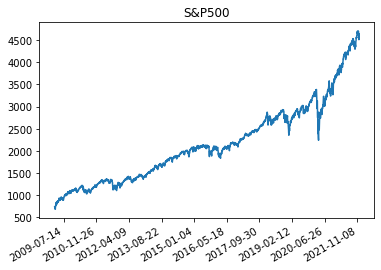

In [22]:
data_plot("SP500.csv", "S&P500", 1250, 500)

W jaki sposób możemy opisać zmiany ceny równaniem? Spróbujmy wyjść z prostego modelu, który zakłada, że im wyższa cena akcji, tym szybciej będzie ona rosła. Niech $C(t)$ oznacza wartość ceny w czasie $t$, natomiast $w$ współczynnik wzrostu ceny:

$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw.$$

Dla uproszczenia obliczeń wygenerujmy wykres z liczbami zamiast dat:

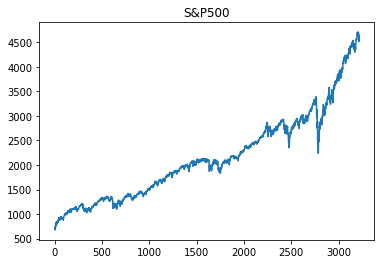

In [26]:
sp500 = take_data("SP500.csv", 1) #z liczbami na osi 0x
plt.title("S&P500")
plt.plot(sp500[1250:])
plt.show()

Odczytajmy z wykresu dwie wartości: $$C(0) = 735$$  $$C(3000) = 3787$$ a następnie rozwiążmy równanie.
$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw$$

$$\int \frac{\mathrm{d}C}{C} = w\int \mathrm{d}t$$

$$\mathrm{ln}(C) = wt + K$$

Z warunku $C(0) = 735$:

$$K = \mathrm{ln}(735) \approx 6,6 $$

Natomiast z warunku $C(3000) = 3787$:

$$w \approx 0,00054$$

Ostatecznie rozwiązaniem będzie:

$$ C(t) = e^{6,6}\cdot e^{0,00054t} $$

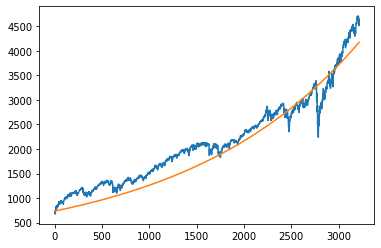

In [39]:
time = [t for t in range(0, 3216)]
solution = [math.exp(6.6)*math.exp(0.00054*t) for t in range(0, 3216)]
plt.plot(sp500[1250:])
plt.plot(time, solution)
plt.show()

Początkowo wykres całkiem dobrze odzwierciedla dynamikę zmiany cen akcji, jednak po $t = 3000$ tempo wzrostu jest zbyt niskie. Odczytajmy wartość $C$ dla $t = 3150$:
$$C(3150) = 4524$$ a następnie znajdźmy stałe $K$ oraz $w$ dla nowych warunków.

Z warunku $C(0) = 735$:

$$K = \mathrm{ln}(735) \approx 6,6 $$

Natomiast z warunku $C(3150) = 4524$:

$$w \approx 0,00056$$

Ostatecznie rozwiązaniem będzie:

$$ C(t) = e^{6,6}\cdot e^{0,00056t} $$

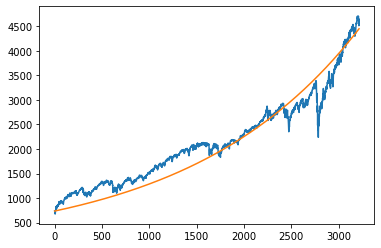

In [40]:
time = [t for t in range(0, 3216)]
solution = [math.exp(6.6)*math.exp(0.00056*t) for t in range(0, 3216)]
plt.plot(sp500[1250:])
plt.plot(time, solution)
plt.show()

Widać, że krzywa lepiej przybliża wykres cen akcji w późniejszym okresie, jednak mniej pokrywa się ze stanem sprzed roku 2016 (na wykresie będzie to wartość 1700). 

### IS3N
Przyjrzyjmy się wykresowi akcji IS3N. Zachowuje się on inaczej od wykresu cen S&P500 - można zauważyć, że w pewnym momencie wartość akcji zaczyna się stabilizować i przestaje rosnąć.

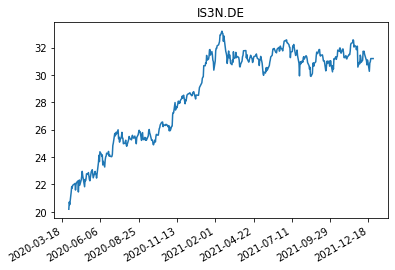

In [26]:
is3n_times = take_data("IS3N.DE.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in is3n_times[1350:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 80))
plt.plot(times, is3n[1350:])
plt.gcf().autofmt_xdate()
plt.title("IS3N.DE")
plt.show()

Można zatem spodziewać się, że dynamikę zmian dobrze przybliży równanie logarytmiczne, w którym pojemnością środowiskową będzie $k = 32$:

$$C'(t) = r\cdot C(t)\cdot(1- \frac{C(t)}{32})$$

Rozwiązaniem będzie:

$$C(t) = \frac{1}{\frac{1}{32} + (\frac{1}{C_0} - \frac{1}{32})e^{-rt}}$$

Aby odczytać dane z wykresu, wygenerujmy wykres z liczbami na osi $x$:

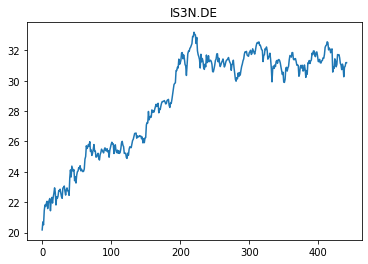

In [25]:
is3n = take_data("IS3N.DE.csv", 4)
for index in range(0, len(is3n)):
    if is3n[index] == 'null':
        is3n[index] = is3n[index - 1]
        
plt.title("IS3N.DE")
plt.plot(is3n[1350:])
plt.show()

I odczytajmy potrzebne dane; więcej niż dla dwóch punktów, aby otrzymać możliwie dokładny wynik:

$$C_0 = C(0) = 20,176001$$

$$C(180) = 25,848$$
$$C(50) = 23,77$$
$$C(100) = 25,812$$


Wyliczmy współczynnik $r$. Po przekształceniach dostaniemy, że:

$$r = \frac{\mathrm{ln}(\frac{C(K - C_0)}{C_0(K-C)})}{t}$$

Po podstawieniu znanych wartości dla $t = 50, 100, 180$ otrzymujemy:

$$r_1 = 0,01053, \quad  r_2 = 0,00893, \quad r_3 = 0,005006$$

Po wyliczeniu średniej:

$$r = 0.00815$$ 

Mamy więc rozwiązanie postaci: 

$$C(t) = \frac{1}{\frac{1}{32} + 0,01831 \cdot e^{-0,00815t}}$$

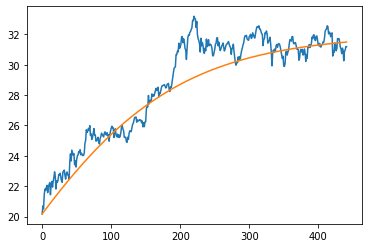

In [199]:
time = [t for t in range(0, 442)]
solution = [1/(1/32 + 0.01831 * math.exp(-0.00815*t)) for t in range(0, 442)]
plt.plot(is3n[1350:])
plt.plot(time, solution)
plt.show()

### Tesla

Przyjrzyjmy się wykresowi przedstawiającemu ceny akcji firmy Tesla:

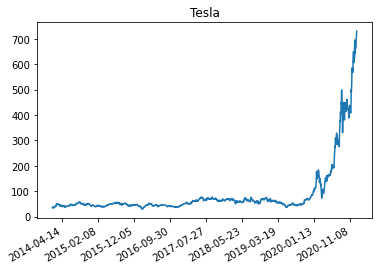

In [9]:
tesla = take_data("Tesla.csv", 1)
tesla_times = take_data("Tesla.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in tesla_times[:1750]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 300))
plt.plot(times, tesla[:1750])
plt.gcf().autofmt_xdate()
plt.title("Tesla")
plt.show()

Wygląda on oryginalnie: przez kilka lat cena utrzymywała się na względnie stałym poziomie. Pod koniec 2019 roku zaczęła rosnąć, ale znacznie spadła w okolicach marca 2020 roku z powodu paniki związanej z rozpoczynającą się pandemią. To jednak tylko chwilowo zahamowało jej wzrost; po kilku miesiącach cena wzrastała w bardzo szybkim tempie. 

Spróbujmy przybliżyć dynamikę zmian cen akcji Tesli za pomocą prostego równania:

$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw.$$

Gdzie $C(t)$ oznacza cenę w czasie $t$, natomiast $w$ współczynnik wzrostu ceny.
Mamy więc:

$$\mathrm{ln}(C) = wt + K$$

Aby wyznaczyć współczynnik $w$ oraz stałą całkowania, potrzebujemy odczytać dwie wartości z wykresu. Zamieńmy więc daty na liczby reprezentujące czas:

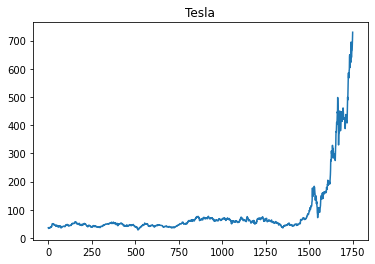

In [7]:
tesla = take_data("Tesla.csv", 1) #z liczbami na osi 0x
plt.title("Tesla")
plt.plot(tesla[:1750])
plt.show()

Odczytajmy dane dla $t=1400$ oraz dla $t=1750$:
$$C(1400) = 43,128$$
$$C(1750) = 735,11$$

Po podstawieniu do równania dostajemy:

$$w \approx 0,0081 $$
$$K \approx -7,5792 $$

Więc ostatecznie:

$$ C(t) = e^{-7,5792}\cdot e^{0,0081t} $$

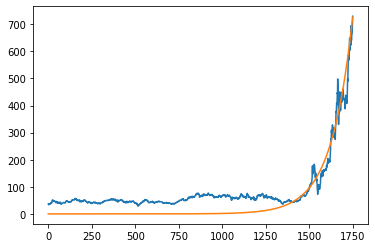

In [15]:
time = [t for t in range(0, 1750)]
solution = [math.exp(-7.5792)*math.exp(0.0081*t) for t in range(0, 1750)]
plt.plot(tesla[:1750])
plt.plot(time, solution)
plt.show()

Krzywa w dobry sposób odwzorowuje dynamikę zmian ceny akcji Tesli.

Jednak zobaczmy, co stało się z cenami Tesli w późniejszym czasie:

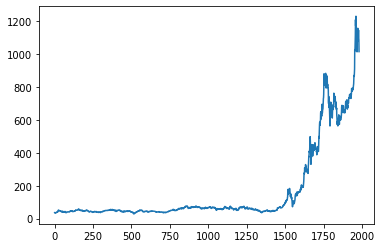

In [18]:
time = [t for t in range(0, 1982)]
plt.plot(tesla)
plt.show()

Akcje zaczęły gwałtownie spadać! Jeżeli spróbujemy porównać je z otrzymanym rozwiązaniem, otrzymamy:

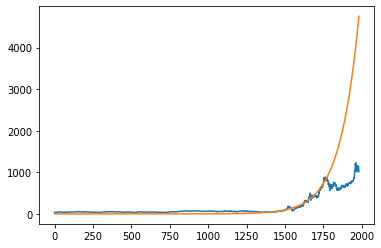

In [19]:
time = [t for t in range(0, 1982)]
solution = [math.exp(-7.5792)*math.exp(0.0081*t) for t in range(0, 1982)]
plt.plot(tesla)
plt.plot(time, solution)
plt.show()

Widać więc, że równanie było dobrze dopasowane do zachowania cen akcji Tesli tylko do pewnego momentu, ponieważ nie przewidziało nagłego spadku.

Dlaczego jednak nastąpił ten spadek? I czy moglibyśmy przewidzieć go metodą analityczną?

Okazuje się, że dużą rolę w zachowaniu rynku akcji odgrywają czynniki losowe. Nagłe spadki lub wzrosty moogą być spowodowane wybuchem pandemii, niestabilną sytuacją gospodarczą, zmianą zarządu w danej firmie lub nawet nieprzemyślaną wypowiedzią prezesa. Nie wszystko jesteśmy w stanie przewidzieć. 

# Regresja liniowa na przykładzie Forda
Spójrzmy na wykres cen akcji firmy Ford. 

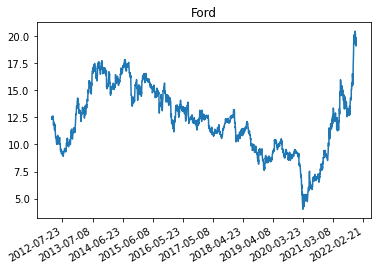

In [27]:
data_plot("Ford.csv", "Ford", 0, 350)

Ciężko dopatrzyć się tutaj reguły wzrostu lub spadku - największą rolę, jak się zdaje, odegrały czynniki losowe. Czy istnieje sposób, w jaki możemy odwzorować to zachowanie?

Można spodziewać się, że ceny akcji Forda są zależne od ogólnej kondycji sektora związanego z motoryzacją. Spójrzmy na wykresy pokrewnych firm dla takiego samego przedziału czasowego:

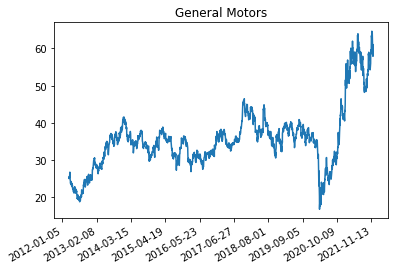

In [19]:
data_plot("GM.csv", "General Motors", 336, 400)

General Motors jest jedną z największych spółek na świecie. Zajmuje się między innymi produkcją samochodów i silników. 

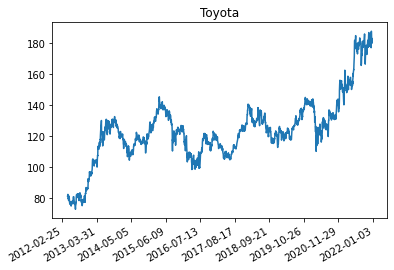

In [29]:
data_plot("Toyota_2.csv", "Toyota", 335, 400)

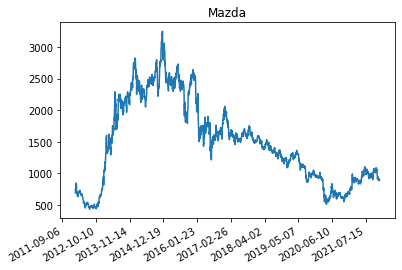

In [30]:
data_plot("Mazda.csv", "Mazda", 6, 400)

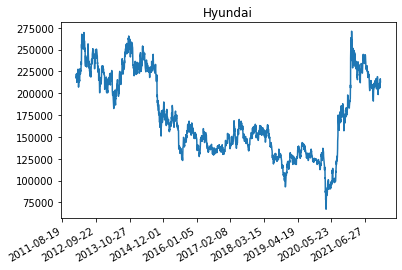

In [31]:
data_plot("Hyundai.csv", "Hyundai", 0, 400)

Na podstawie tych wykresów oraz wykresu S&P500 spróbujemy odwzorować zachowanie akcji Forda. Posłuży nam do tego regresja liniowa.

Najpierw pobieramy potrzebne dane i ucinamy je tak, by obejmowały właściwy czas (taki sam jak dane dla Forda):

In [33]:
sp500 = take_data("SP500.csv", 1)
Ford = take_data("Ford.csv", 1)
GM = take_data("GM.csv", 1)
Toyota = take_data("Toyota_2.csv", 1)
Mazda = take_data("Mazda.csv", 1)
Hyundai = take_data("Hyundai.csv", 1)

sp500 = sp500[2022:]
GM= GM[336:]
Toyota = Toyota[325:]
Mazda = Mazda[6:]

Następnie logarytmizujemy zmiany cen wszystkich akcji:

In [34]:
delt = np.diff(np.log(Ford))
delt_sp500 = np.diff(np.log(sp500)) # zlogarytmowane przyrosty!
delt_GM = np.diff(np.log(GM)) 
delt_Toyota = np.diff(np.log(Toyota))
delt_Hyundai = np.diff(np.log(Hyundai))
delt_Mazda = np.diff(np.log(Mazda))

### Jak działa regresja liniowa?

Chcemy odzworować zachowanie cen akcji firmy $Y$. Aby to zrobić, bierzemy pod uwagę ceny akcji z firm: $X_1, X_2, \dots, X_n$. Mamy więc równanie:

$$ Y(t) = \beta_0 + \beta_1 \cdot X_1(t) + \dots + \beta_n \cdot X_n(t) $$

gdzie $X_1(t), \dots , X_n(t)$ oznaczają zmiany cen akcji poszczególnych firm $X_k$ dla czasu $t = 0, 1, 2, 3...$

Współczynniki $\beta_0, \beta_1, \beta_2 \dots$ na ten moment są nieznane. $\beta_0$ jest wyrazem wolnym w równaniu, odpowiada więc przesunięciu wykresu. Pozostałe współczynniki: $\beta_k$, gdzie $k \ne 0$ oznaczają to jak istotne dla zmian cen akcji firmy $Y$ są zmiany cen akcji firmy $X_k$.

Aby wyliczyć współczynniki, bierzemy pewien czas dla którego program będzie odwzorowywał wykres cen firmy $Y$, biorąc ceny akcji firm $X_1, X_2,\dots, X_n$ z odpowiednią wagą. Po jego upływie wyliczana jest średnia ważność każdego składnika, czyli współczynniki $\beta_1, \beta_2, \dots, \beta_n$ oraz wyraz wolny $\beta_0$. 

Dla $t = 1, 2, \dots, j$ można przedstawić to równanie w postaci macierzowej i skorzystamy z tego w poniższej funkcji linear_regression_plot. Zapiszmy $Y(i)$ jako $y_i$, a $X_k(i)$ jako $x_{ik}$. Wtedy:
$$ y_i = \beta_0 + \beta_1 \cdot x_{i1} + \dots + \beta_n \cdot x_{in} $$.

W postaci macierzowej:

$$ Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_j \end{pmatrix}, 
\quad 
   X = \begin{pmatrix} 1 & x_{11} & x_{12} & \dots & x_{1n} \\ 1  & x_{21} & x_{22} & \dots & x_{2n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{j1} & x_{j2} & \dots & x_{jn} \end{pmatrix},
   \quad \beta = \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n \end{pmatrix} $$
    
Mamy więc:

$$ Y = X \cdot \beta $$

In [38]:
def linear_regression_plot(cal, which_firms, array = False):
    if type(cal) != int or type(which_firms) != str or type(array) != bool:
        raise TypeError
        
    Y = delt[0:cal,]  # próbka początkowa użyta do trenowania regresji czyli do znalezienia bet w równianiu 1)
    Y_real = delt[cal:,]
    X0 = np.ones(np.shape(Y))
    
    if which_firms == "S&P500":
        X1 = delt_sp500[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] )],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "GM":
        X1 = delt_GM[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "S&P500 & GM":
        X1 = delt_sp500[0:cal,] 
        X2 = delt_GM[0:cal,]    
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2]).T
        
    elif which_firms == "Toyota & GM":
        X1 = delt_Toyota[0:cal,] 
        X2 = delt_GM[0:cal,] 
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Toyota[cal:,]*30 ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1, X2]).T
    
    elif which_firms == "S&P500 & Toyota & GM":
        X1 = delt_Toyota[0:cal,] 
        X2 = delt_GM[0:cal,]
        X3 = delt_sp500[0:cal,]
    
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_Toyota[cal:,] ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2,X3]).T 
        
    elif which_firms == "S&P500 & Toyota & GM & Hyundai":
        X1 = delt_Toyota[0:cal,] 
        X2 = delt_GM[0:cal,]
        X3 = delt_sp500[0:cal,]
        X4 = delt_Hyundai[0:cal,]
    
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_Toyota[cal:,] ),np.array(delt_GM[cal:,] ), np.array(delt_Hyundai[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2,X3,X4]).T 
        
    elif which_firms == "S&P500 & Toyota & GM & Hyundai & Mazda":
        X1 = delt_Toyota[0:cal,] 
        X2 = delt_GM[0:cal,]
        X3 = delt_sp500[0:cal,]
        X4 = delt_Hyundai[0:cal,]
        X5 = delt_Mazda[0:cal,]
    
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_Toyota[cal:,] ),np.array(delt_GM[cal:,] ), np.array(delt_Hyundai[cal:,] ), np.array(delt_Mazda[cal:,])],dtype=object).T
        X = np.array([X0,X1,X2,X3,X4,X5]).T 
            
    elif which_firms == "GM & Hyundai":
        X1 = delt_GM[0:cal,] 
        X2 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_GM[cal:,]),np.array(delt_Hyundai[cal:,]*100 )],dtype=object).T
        X = np.array([X0,X1,X2]).T
        
    elif which_firms == "S&P500 & Hyundai & GM":
        X1 = delt_sp500[0:cal,]
        X2 = delt_Hyundai[0:cal,] 
        X3 = delt_GM[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_Hyundai[cal:,] ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2,X3]).T 
        
    elif which_firms == "Mazda":
        X1 = delt_Mazda[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Mazda[cal:,]*15 )],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "Mazda & Huyndai":
        X1 = delt_Mazda[0:cal,] 
        X2 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Mazda[cal:,]),np.array(delt_Hyundai[cal:,]*100 )],dtype=object).T
        X = np.array([X0,X1,X2]).T
        
    elif which_firms == "Toyota & Mazda & Hyundai":
        X1 = delt_Toyota[0:cal,] 
        X2 = delt_Mazda[0:cal,] 
        X3 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Toyota[cal:,]*30 ),np.array(-delt_Mazda[cal:,] *30),np.array(delt_Hyundai[cal:,] *30)],dtype=object).T
        X = np.array([X0,X1,X2,X3]).T 
        
    elif which_firms == "Hyundai":
        X1 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Hyundai[cal:,] *105)],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "Toyota":
        X1 = delt_Toyota[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Toyota[cal:,] *30 )],dtype=object).T
        X = np.array([X0,X1]).T
        
    else:
        raise ValueError("No firm '%s'" % which_firms)
        
    Y = np.array(Y).reshape(-1,1)
    
    model = LinearRegression(fit_intercept = False)
    model.fit(X, Y)      # na podstawie równania - tu wchodzą wszystkie zmienne 
    
    betas = model.coef_  # współcznynniki równania
    
    Y_fut = list(np.dot(X_fut,betas.T)) # prognozowane wartości zmiennej
    
    if array:
        seperate_names = list(which_firms)
        headers = ["Wyraz wolny"]
        
        name = ''
        for letter in seperate_names:
            if letter != ' ':
                name += letter
            else:
                headers.append(name)
                name = ''
                
        if name != '':
            headers.append(name)
    
        for name in headers:
            if name == '&':
                headers.remove(name)
            
        table = tabulate(betas, headers, tablefmt="fancy_grid", numalign = "center", stralign = "center")
        print(table)

    forecasts = [Ford[cal]]
    for i in range(np.shape(Y_fut)[0]):
        forecasts.append(forecasts[i]*np.exp(float(Y_fut[i]))) # tylko początkowy punkt brany z prawdziwej ceny, resta wysymulowane
     
    plt.plot(forecasts, label = "Prognozowana cena")
    plt.plot(Ford[cal+1:], label = "Rzeczywista cena")
    plt.legend()
    plt.title('Ceny akcji firmy Ford prognozowane na podstawie cen akcji %s' % which_firms)
    plt.show()

## Ceny akcji firmy Ford

### Szacowanie na podstawie akcji S&P500

Wypróbujmy to narzędzie i odwzorujmy wykres przedstawiający ceny akcji firmy Ford na podstawie cen akcji S&P500.

Text(0.5, 1.0, 'S&P500')

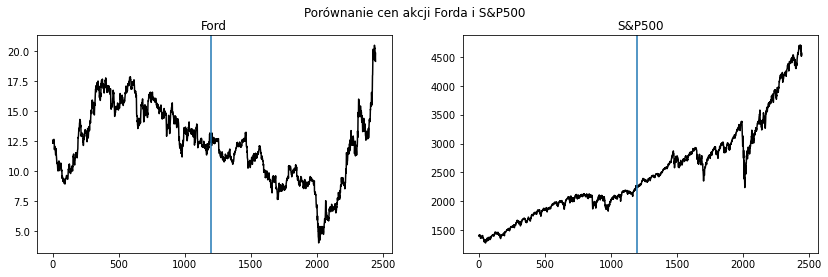

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Porównanie cen akcji Forda i S&P500')
ax1.plot(Ford, color = "black")
ax1.axvline(x=1200)
ax1.set_title("Ford")
ax2.plot(sp500, color = "black")
ax2.axvline(x=1200)
ax2.set_title("S&P500")

Biorąc pod uwagę pierwsze 1200 danych (na lewo od niebieskiej linii) program będzie szacował najlepszą wartość współczynników $\beta_0$ i $\beta_1$, aby otrzymać wzór:

$$F(t) = \beta_0 + \beta_1 \cdot Sp(t)$$

gdzie $F(t)$ oznacza szacowaną zmianę ceny akcji Forda w czasie $t$, a $Sp(t)$ zmianę ceny akcji S&P500 w czasie $t$.

Następnie dla $t > 1200$ program wygeneruje wykres na podstawie wyliczonego wzoru.

╒═══════════════╤═══════════╤════════════╤═══════════╕
│  Wyraz wolny  │  Toyota   │   Mazda    │  Hyundai  │
╞═══════════════╪═══════════╪════════════╪═══════════╡
│  2.2705e-05   │ 0.0030104 │ -0.0355976 │ 0.0108877 │
╘═══════════════╧═══════════╧════════════╧═══════════╛


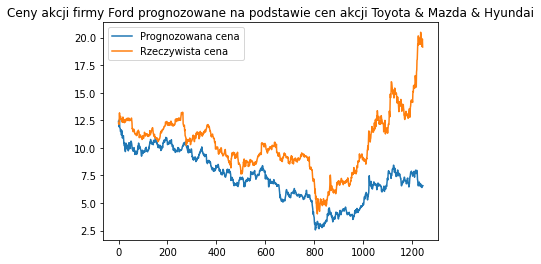

In [40]:
linear_regression_plot(1200, "Toyota & Mazda & Hyundai", True)

╒═══════════════╤══════════╕
│  Wyraz wolny  │  S&P500  │
╞═══════════════╪══════════╡
│ -0.000471731  │ 1.14748  │
╘═══════════════╧══════════╛


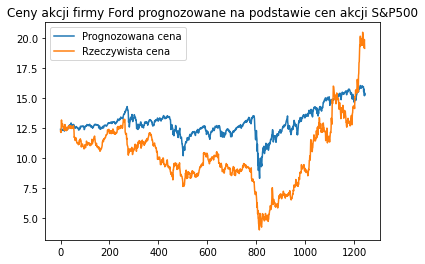

In [41]:
linear_regression_plot(1200, "S&P500", True)

W tabeli mamy zapisane współczynniki $\beta$. Równanie, którym szacujemy zmiany cen akcji Forda, ma więc postać:

$$ F(t) = -0,000471731 + 1,14748 \cdot Sp(t) $$

Jak można było się spodziewać, to szacowanie nie jest zbyt dokładne. S&P500 jest ważnym wskaźnikiem, jednak nie mówi wiele o sytuacji w sektorze motoryzacyjnym. Mimo to widać podobieństwa między dwoma wykresami - mocny spadek w czasie $t \approx 1000$ (wybuch pandemii), późniejszą tendencję wzrostową czy podobne zachowanie dla czasu $t \approx 500$ i $t \approx 250$. Można wywnioskować, że wtedy miały miejsca ogólne kryzysy lub wzrosty gospodarcze.


### Szacowanie na podstawie akcji General Motors

Spróbujmy więc odwzorować wykres cen Forda na podstawie akcji General Motors, których ceny lepiej odwzorowują kondycję rynku motoryzacyjnego. 

Text(0.5, 1.0, 'General Motors')

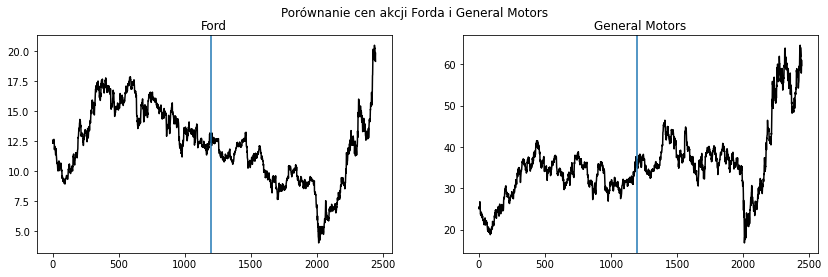

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Porównanie cen akcji Forda i General Motors')
ax1.plot(Ford, color = "black")
ax1.axvline(x=1200)
ax1.set_title("Ford")
ax2.plot(GM, color = "black")
ax2.axvline(x=1200)
ax2.set_title("General Motors")

Wykresy są bardziej podobne, gdyż firmy pochodzą z tego samego sektora. Możemy spodziewać się wierniejszego odwzorowania.

╒═══════════════╤══════════╕
│  Wyraz wolny  │    GM    │
╞═══════════════╪══════════╡
│ -0.000192154  │ 0.635303 │
╘═══════════════╧══════════╛


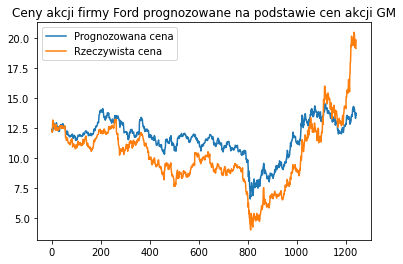

In [42]:
linear_regression_plot(1200, "GM", True)

Mimo, że odwzorowanie znowu zostało wykonane na podstawie akcji tylko jednej firmy, tym razem jest dużo dokładniejsze, a wykres szacowanych cen jest mniej przesunięty w górę względem rzeczywistego.

### Szacowanie na podstawie akcji General Motors, S&P500 oraz innych spółek motoryzacyjnych

Teraz dokonajmy szacowania jednocześnie na podstawie akcji S&P500 oraz General Motors.

╒═══════════════╤══════════╤══════════╕
│  Wyraz wolny  │  S&P500  │    GM    │
╞═══════════════╪══════════╪══════════╡
│ -0.000386032  │ 0.611808 │ 0.454627 │
╘═══════════════╧══════════╧══════════╛


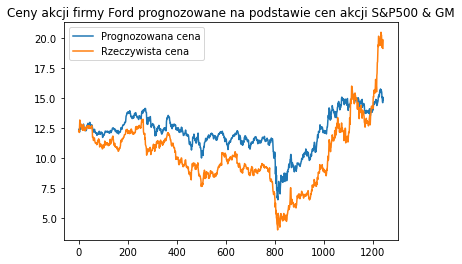

In [43]:
linear_regression_plot(1200, "S&P500 & GM", True)

Równanie ma postać:

$$ F(t) = -0,000386032 + 0,611808 \cdot Sp(t) + 0,454627 \cdot G(t)$$

gdzie $Sp(t)$ oraz $G(t)$ oznaczają kolejno zmiany ceny akcji S&P500 i General Motors w czasie $t$.

Wygenerowany wykres dokładniej odwzorowuje kształt (widać różnicę w okolicach $t = 200$), gdyż wzięliśmy pod uwagę dwa indeksy - jeden ściśle powiązany z motoryzacją i jeden odnoszący się do ogólnej kondycji rynkowej. Możemy uwzględnić jeszcze jedną spółkę: Toyotę.  

Text(0.5, 1.0, 'Toyota')

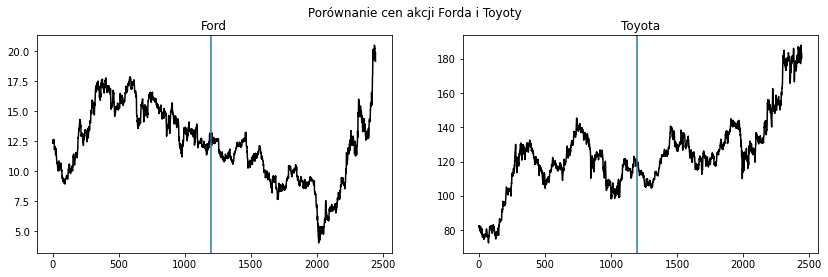

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Porównanie cen akcji Forda i Toyoty')
ax1.plot(Ford, color = "black")
ax1.axvline(x=1200)
ax1.set_title("Ford")
ax2.plot(Toyota, color = "black")
ax2.axvline(x=1200)
ax2.set_title("Toyota")

Wtedy dostaniemy:

╒═══════════════╤═════════════╤══════════╤══════════╕
│  Wyraz wolny  │   S&P500    │  Toyota  │    GM    │
╞═══════════════╪═════════════╪══════════╪══════════╡
│  -0.00038397  │ -0.00678326 │ 0.454703 │ 0.611757 │
╘═══════════════╧═════════════╧══════════╧══════════╛


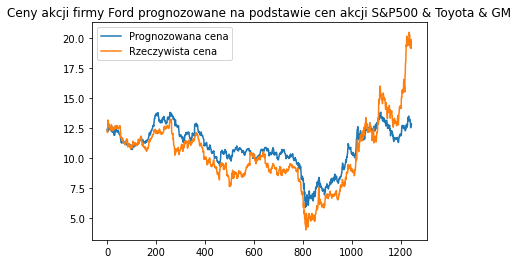

In [44]:
linear_regression_plot(1200, "S&P500 & Toyota & GM", True)

$$ F(t) = -0,00038397 - 0,00678326 \cdot Sp(t) + 0,454703 \cdot T(t) + 0,611757 \cdot G(t)$$

gdzie $T(t)$ niech oznacza zmianę ceny akcji Toyoty w czasie $t$.

Widać, że tutaj wartość akcji S&P500 ma dużo (100 razy!) mniejszą wagą niż wtedy, gdy Toyoty nie była brana pod uwagę. 

Dzieje się tak, ponieważ Toyota ma duże znaczenie na giełdzie. W 2020 roku zajęła pierwsze miejsce wśród największych producentów samochodów na świecie. Można zatem wnioskować, że ceny jej akcji mogą dużo powiedzieć o sytuacji rynku motoryzacyjnego na świecie.

Zobaczmy co stanie się, gdy wygenerujemy wykres uwzględniający jeszcze dwie spółki: Mazdę oraz Hyundai.

Text(0.5, 1.0, 'Mazda')

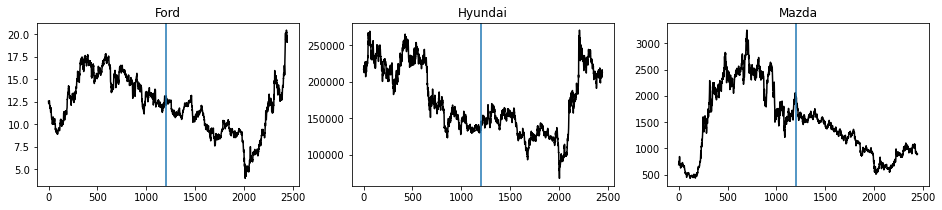

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,3))
ax1.plot(Ford, color = "black")
ax1.axvline(x=1200)
ax1.set_title("Ford")
ax2.plot(Hyundai, color = "black")
ax2.axvline(x=1200)
ax2.set_title("Hyundai")
ax3.plot(Mazda, color = "black")
ax3.axvline(x=1200)
ax3.set_title("Mazda")

╒═══════════════╤═════════════╤══════════╤══════════╤════════════╤════════════╕
│  Wyraz wolny  │   S&P500    │  Toyota  │    GM    │  Hyundai   │   Mazda    │
╞═══════════════╪═════════════╪══════════╪══════════╪════════════╪════════════╡
│ -0.000360195  │ -0.00580567 │ 0.456119 │ 0.605051 │ 0.00731119 │ -0.0214686 │
╘═══════════════╧═════════════╧══════════╧══════════╧════════════╧════════════╛


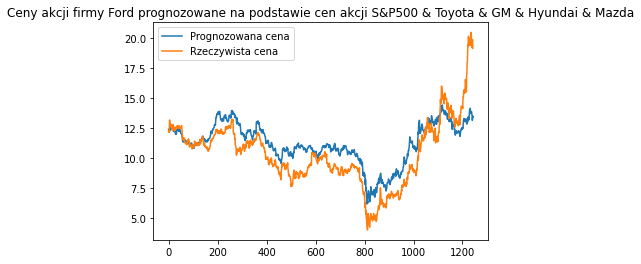

In [45]:
linear_regression_plot(1200, "S&P500 & Toyota & GM & Hyundai & Mazda", True)

Współczynnik stojący przy cenach firmy Hyundai jest równy jedynie $0,00731119$, a przy Mazdzie $-0,0214686$ - wynika to z tego, że ceny ich akcji są innych rzędów niż ceny akcji Forda. 

Co ciekawe, mimo że wzięliśmy pod uwagę aż pięć indeksów i prawie cały wykres został odwzorowany z dużą dokładnością, nie udało się przewidzieć końcowego przyrostu akcji Forda ($t \approx 1200$). Wskazuje to na niezależne zdarzenie, które zaszło w badanej firmie, a nie miało miejsca w innych.

### Przewidywanie na podstawie cen akcji Toyoty, Hyundaia i Mazdy

Do tej pory, używając regresji liniowej, odwzorowywaliśmy wykres cen akcji Forda. Czy możemy jednak użyć jej, aby przewidywać ceny? 

Weźmy akcje Toyoty, Mazdy i Hyundaia i sprawdźmy, że regresja liniowa dobrze odwzorowuje zmiany cen Forda.

╒═══════════════╤════════════╤════════════╤═══════════╕
│  Wyraz wolny  │   Toyota   │   Mazda    │  Hyundai  │
╞═══════════════╪════════════╪════════════╪═══════════╡
│ -7.46618e-06  │ 0.00733283 │ -0.0344496 │ 0.0148358 │
╘═══════════════╧════════════╧════════════╧═══════════╛


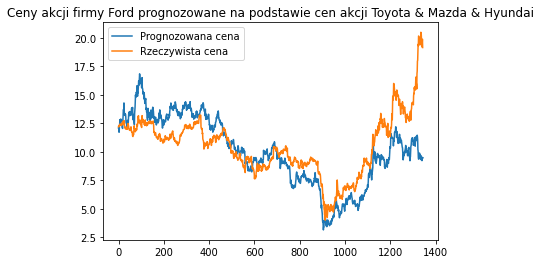

In [74]:
linear_regression_plot(1100, "Toyota & Mazda & Hyundai", True)

Co nam to daje?

Firma Ford jest na giełdzie amerykańskiej, natomiast Toyota i Mazda na japońskiej, a Hyundai na południowokoreańskiej. Giełda nie jest otwarta przez cały dzień: londyńska jest otwarta w godzinach 9:00 -17:30, nowojorska 15:30-22:00, natomiast w Tokyo zamyka się już o 7:00 (godziny podane w czasie polskim). Oznacza to, że kiedy rynek amerykański dopiero się otwiera, japoński i południowokoreański są już zamknięte - wiemy zatem, jak tego dnia zachowały się akcje m.in Toyoty, Hyundaia i Mazdy. Na podstawie regresji liniowej możemy więc z pewnym przybliżeniem przewidzieć, co stanie się tego dnia z cenami akcji firmy Ford.

## Model dwóch firm

### Analitycznie

Weźmy dwie firmy: $x$ i $y$ i spróbujmy opisać równaniami, jak ich ceny akcji są od siebie zależne. Zacznijmy od firmy $x$.

Załóżmy, że ceny akcji firmy $x$ będą stale przyrastać o pewną wartość zależną od ceny: $a \cdot x$ - reprezentuje to klientów nabywających i sprzedających akcje niezależnie od firmy $y$. Dodatkowo, część kapitału ($b$) przepłynie do firmy $y$, ponieważ niektórzy sprzedadzą akcje firmy $x$, aby zakupić akcje firmy $y$. Podobnie w drugą stronę - ludzie będą kupować akcje firmy $x$ za pieniądze uzyskane ze sprzedaży akcji firmy $y$, co reprezentuje współczynnik $c$.  

Opisuje to równanie:
$$ \frac{dx}{dt} = x \cdot (a - b) + c \cdot y $$

W analogiczny sposób opiszemy zmianę cen akcji w firmie $y$ i otrzymamy układ równań:

$$
\left\{ \begin{array}{ll}
\frac{dx}{dt} = x \cdot (a - b) + c \cdot y\\
\frac{dy}{dt} = y \cdot (d - c) + b \cdot x\\
\end{array} \right.
$$

Aby rozwiązać go analitycznie, załóżmy że współczynniki $a, b, c, d$ są stałe i dodatnie oraz weźmy warunki początkowe $y(0) = y_0$ i $x(0) = x_0$. 
Dla uproszczenia obliczeń pod wyrażenia $(a-b)$ oraz $(d-c)$ podstawmy stałe $g = a-b$ i $f = d-c$. Mamy teraz:

$$
\left\{ \begin{array}{ll}
\frac{dx}{dt} = x \cdot g + c \cdot y\\
\frac{dy}{dt} = y \cdot f + b \cdot x\\
\end{array} \right.
$$

Z pierwszego równania wyznaczmy $y$:

$$y = \frac{1}{c}(\frac{dx}{dt} - g x)$$

Więc:

$$\frac{dy}{dt} = \frac{1}{c}(\frac{d^2x}{dt^2} - g \frac{dx}{dt})$$

Teraz podstawmy wyliczone $y$ i $\frac{dy}{dt}$ do drugiego równania:

$$\frac{1}{c}(\frac{d^2x}{dt^2} - g \frac{dx}{dt}) = \frac{f}{c}(\frac{dx}{dt} - g x) + b \cdot x$$ 

$$\frac{d^2x}{dt^2} - g \frac{dx}{dt} = f\frac{dx}{dt} + x (bc - ef)$$ 

Przenosząc na jedną stronę otrzymujamy:

$$\frac{d^2x}{dt^2} - \frac{dx}{dt} (g + f) + x (gf - bc) = 0$$ 

Jest to jednorodny układ równań drugiego stopnia o stałych współczynnikach. Jego wielomian charakterystyczny to:

$$r^2 - r (g + f) + (gf - bc) = 0$$

$$\Delta = (g+f)^2 - 4(gf - bc)$$

Sprawdźmy wartość $\Delta$:

$$\Delta = (g+f)^2 - 4(gf - bc)$$
$$\Delta = g^2 + f^2 + 2gf - 4gf + 4bc$$
$$\Delta = (g - f)^2 + 4bc$$

Współczynniki $b$ i $c$ są dodatnie, więc $\Delta > 0$. W takim razie:

$$r_{1,2} = \frac{g + f \pm \sqrt{(g - f)^2 + 4bc}}{2}$$

Rozwiązaniem równania jest:
$$x(t) = C_1\cdot e^{\frac{g + f + \sqrt{(g - f)^2 + 4bc}}{2} t } + C_2\cdot e ^{\frac{g + f - \sqrt{(g - f)^2 + 4bc}}{2} t} $$

Podstawiając $x(0) = x_0$:

$$x(0) = C_1 + C_2 = x_0$$
$$ C_2 = x_0 - C_1 $$

Ostatecznie:
$$x(t) = C_1\cdot e^{\frac{g + f + \sqrt{(g - f)^2 + 4bc}}{2} t } + (x_0 - C_1)\cdot e ^{\frac{g + f - \sqrt{(g - f)^2 + 4bc}}{2} t} $$

Aby obliczyć $y(t)$, podstawimy otrzymane $x(t)$ do równania:

$$y = \frac{1}{c}(\frac{dx}{dt} - g x)$$


$$y = \frac{1}{c}(C_1 \cdot r_1 \cdot e^{r_1\cdot t} + (x_0 - C_1)\cdot r_2 \cdot e ^{r_2 \cdot t} - g ( C_1 \cdot e^{r_1\cdot t} + (x_0 - C_1) \cdot e ^{r_2 \cdot t}))$$

$$y = \frac{1}{c} (e^{r_1 t} \cdot C_1 (r_1 - g) + e^{r_2 t} \cdot (x_0 - C_1)(r_2 - g)) $$


Podstawiając $y(0) = y_0$:

$$ C_1 = \frac{c y_0 - x_0 \cdot (r_2 - g)}{r_1 - r_2} $$

$$C_2 = x_0 - C_1 = \frac{x_0 \cdot (r_1 - g) - c y_0}{r_1 - r_2} $$

Zauważmy, że niezależnie od współczynników $r_1 \ne r_2$, gdyż $\Delta \ne 0$.

Ostatecznie:

$$y(t) = \frac{1}{c} (e^{r_1 t} \cdot \frac{c y_0 - x_0 \cdot (r_2 - g)}{r_1 - r_2} (r_1 - g) + e^{r_2 t} \cdot \frac{x_0 \cdot (r_1 - g) - c y_0}{r_1 - r_2}(r_2 - g)) $$

$$x(t) = \frac{c y_0 - x_0 \cdot (r_2 - g)}{r_1 - r_2}\cdot e^{r_1 t} + \frac{x_0 \cdot (r_1 - g) - c y_0}{r_1 - r_2}\cdot e ^{r_2 t}  $$



Wykorzystajmy to teraz w praktyce. Weźmy następujący układ równań:

$$
\left\{ \begin{array}{ll}
\frac{dx}{dt} = x \cdot (0,00025 - 0,0015) + 0,0015 \cdot y\\
\frac{dy}{dt} = y \cdot (0,00035 - 0,0015) + 0,0015 \cdot x\\
\end{array} \right.
$$

Ceny akcji firmy $x$ niezależnie rośną co jednostkę czasu o $0,025\%$, a firmy $y$ o $0,035\%$. Firma $y$ przejmuje $0,15\%$ akcji firmy $x\%$, a firma $x$ przejmuje $0,15\%$ akcji firmy $y$. 

Weźmy warunki początkowe $x(0) = 5$, $y(0) = 10$.

Po rozwiązaniu układu równań otrzymujemy:

$$x(t) = 7,4139 \cdot e^{0,0003 t} - 2,41393 \cdot e^{-0,0027 t}$$

$$y(t) = 7,6652 \cdot e^{0,0003 t} + 2,3348 \cdot e^{-0,0027 t}$$

Wykresy funkcji $x(t)$ i $y(t)$ wyglądają następująco:

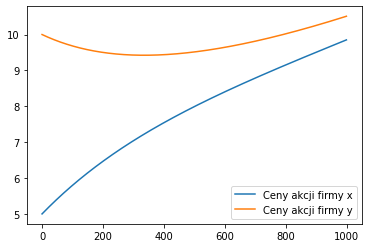

In [13]:
wygeneruj_wykres(0.00025, 0.0015, 0.0015, 0.00035, 5, 10)

### Numerycznie

Jednak jeśli przyjrzymy się wykresowi cen dowolnych akcji, zobaczymy, że nie rośnie on w prosty sposób, a oscyluje. Weźmy na przykład S&P500 dla krótkiego okresu, aby dobrze było widać wahania:

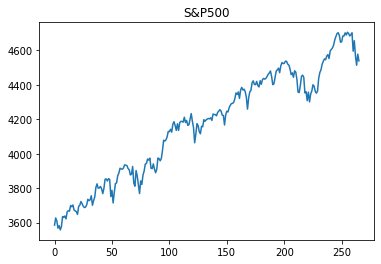

In [10]:
sp500 = take_data("SP500.csv", 1)
plt.title("S&P500")
plt.plot(sp500[4200:])
plt.show()

Mimo, że w wielu miejscach wystąpiły spadki ceny, dla doświadczonego akcjonariusza nie powinny być powodem go niepokoju. Jest to bowiem naturalne dla giełdy, iż po trwającym wzroście ceny nastąpi korekta - chwilowy spadek cen akcji - a później powrót do poprzedniego trendu. Dopiero jeśli "korekta" trwa zbyt długo, może świadczyć o pogarszającej się sytuacji. 

Aby lepiej odwzorować chwilowe wahania cen akcji, wszystike współczynniki $a, b, c, d$ w układzie równań nie mogą być stałe. 

$$
\left\{ \begin{array}{ll}
\frac{dx}{dt} = x \cdot (a - b \cdot \sin{\frac{t}{50}}) + c \cdot (-\sin{\frac{t}{50}}) \cdot y\\
\frac{dy}{dt} = y \cdot (d - c \cdot (-\sin{\frac{t}{50}})) +b \cdot \sin{\frac{t}{50}}\cdot x\\
\end{array} \right.
$$

Czyli pod współczynnik $b$, określający procent akcji przepływający z firmy $x$ do firmy $y$ podstawiamy $b \cdot \sin{\frac{t}{50}}$, aby był on zmienny w czasie. Bierzemy $\sin{\frac{t}{50}}$, nie $\sin{t}$, aby zmiany nie następowały zbyt szybko.

Pod współczynnik $c$ podstawiamy $c \cdot (-\sin{\frac{t}{50}})$, gdyż jest to logiczne, że w momencie w którym dużo akcjonariuszy przepływa z firmy $x$ do firmy $y$, to do firmy $y$ nie będzie przybywać wiele z firmy $x$.

Ten układ równań rozwiążemy metodą numeryczną, biorąc przeliczalne $t = 0, 1, 2, \dots $ i zapisując:

$$x(t+1) = x(t) + \frac{dx}{dt}$$
$$y(t+1) = y(t) + \frac{dy}{dt}$$

Mamy więc:

$$x(t+1) = x(t) + x(t) \cdot (a - b \cdot \sin{\frac{t}{50}}) + c \cdot (-\sin{\frac{t}{50}}) \cdot y(t)$$

$$y(t+1) = y(t) + y(t) \cdot (d - c \cdot (-\sin{\frac{t}{50}})) +b \cdot \sin{\frac{t}{50}}\cdot x(t)$$

Poniżej przedstawiliśmy wykres tego rozwiązania dla:
- warunków początkowych $x(0) = 32$, $y(0) = 47$, 
- $b = c = 0.0015/2$ 
- $a$ i $d$ średnio równych następująco: $1,00022$ i $1,00035$, ale oscylującymi między wartościami $1,0005$ a $1,00035$ i $1,0002$ a $1,00045$:

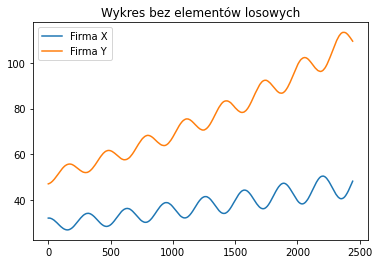

In [47]:
wykres_numerycznie1(sinusy = True)

Wciąż jednak nie wygląda on jak wykres cen akcji, gdyż jest zbyt gładki - znamy dokładny procent akcjonariuszy, który w danym czasie przejdzie z jednej firmy do drugiej. Dodajmy więc niewielki element losowy: 

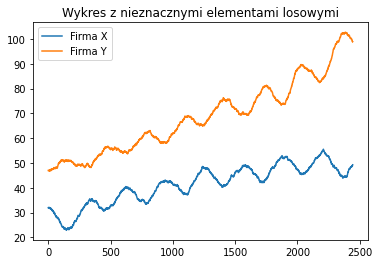

In [48]:
wykres_numerycznie1(sin_rand = True)

Jak wspomnieliśmy na początku pracy, dobrym odwzorowaniem kondycji rynku akcji jest zachowanie indexu S&P500. Aby symulacja była bardziej rzeczywista, należy to wykorzystać. Teraz skorzystamy ze wzoru:

$$x(t+1) = x(t) + \frac{dx}{dt} + \frac{dSp}{dt}$$

$$y(t+1) = y(t) + \frac{dy}{dt} + \frac{dSp}{dt}$$

Gdzie $Sp(t)$ oznacza cenę akcji S&P500 w czasie $t$.

Wykres z uwzględnieniem S&P500 oraz niewielkiego elementu losowego będzie wyglądał następująco:

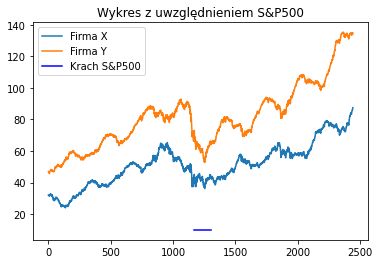

In [67]:
wykres_numerycznie1(sp = True)

Fioletowy odcinek oznacza okres, w którym nastąpił nagły spadek cen akcji na wskutek wybuchu pandemii. Widać, że teraz ceny akcji firm $x$ i $y$ nie pozostały na niego obojętne i również spadły. 

Teraz pozostaje nam uwzględnić istotniejszy element losowy, czyli taki, który mocniej i trwalej wpłynie na ceny akcji firmy $x$ lub $y$. Tutaj możemy spodziewać się mocniejszych wahań, więc aby ceny akcji nie spadły do 0, weźmy inne warunki początkowe: $x(0) = 320 $, $y(0) = 470 $.

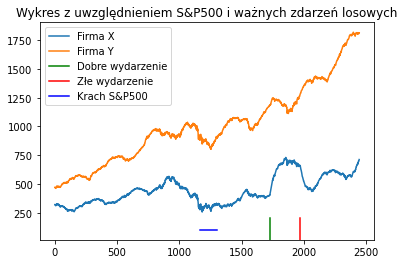

In [54]:
wykres_numerycznie1(sin_rand_sp_events = True)

Zielony odcinek zaznacza punkt, w którym nastąpiło ważne zdarzenie losowe sprzyjające cenom akcji firmy $x$. Po nim ceny zaczęły szybko rosnąć. Natomiast czerwony odcinek reprezentuje zdarzenie niesprzyjające - po nim ceny przez firmy $x$ pewien czas spadały.

W firmie $y$ również miały miejsce ważne wydarzenia losowe, jednak w trosce o czytelność wykresu zdecydowaliśmy się ich nie zaznaczać.

Możemy ulepszyć symulację, biorąc zamiast $\sin{\frac{t}{50}}$ i $-\sin{\frac{t}{50}}$ na przykład $\sin{\frac{t}{40}}$ i $\sin{\frac{t}{70}}$ - wtedy korekty nie będą następywać w równych odstępach czasowych i będą się od siebie różnić:

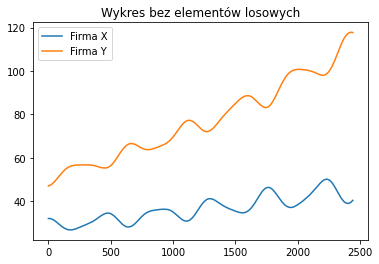

In [75]:
wykres_numerycznie2(sinusy = True)

Dodając szum:

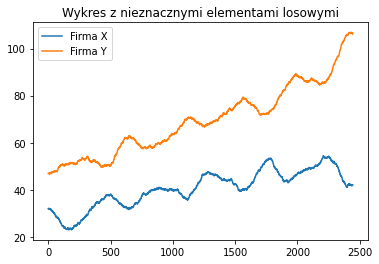

In [76]:
wykres_numerycznie2(sin_rand = True)

Po uwzględnieniu zmian cen akcji S&P500:

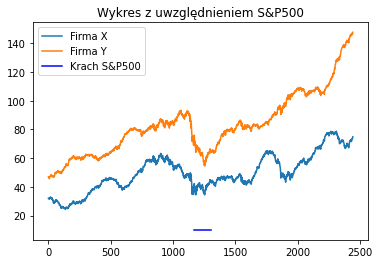

In [82]:
wykres_numerycznie2(sp = True)

Oraz ostatecznie po dodaniu istotnych zmian losowych:

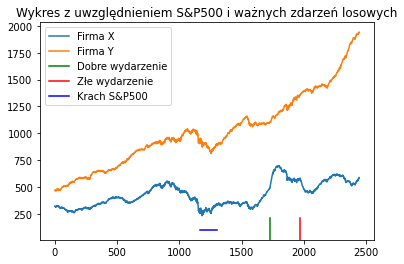

In [78]:
wykres_numerycznie2(sin_rand_sp_events = True)

Gdzie ponownie zielony odcinek oznacza punkt, w którym nastąpiło ważne zdarzenie losowe sprzyjające cenom akcji firmy $x$, a czerwony odcinek reprezentuje zdarzenie niesprzyjające.

In [66]:
def wykres_numerycznie1(sinusy = False, sin_rand = False, sp = False, sin_rand_sp_events = False):
    random.seed(12345)

    sp500 = take_data("SP500.csv", 1)
    ford = take_data("Ford.csv", 1)
    GM = take_data("GM.csv", 1)

    delt_sp500 = np.diff((sp500))

    sp500 = sp500[:2358]

    if sinusy:
        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [32]
        GM_1 = [47]

        for i in range(1,len(GM)):

            gm_r =0.0015 * math.sin(i/50)/2 
            f_r = 0.0015 * -math.sin((i/50))/2

            a = 1 + 0.00001 * random.randint(5,35) #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035
        

            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r) ) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r)))
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )

        plt.plot(ford_1)
        plt.plot(GM_1)
        plt.legend(['Firma X', 'Firma Y'])
        plt.title('Wykres bez elementów losowych')
        plt.show()


    if sin_rand:
        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [32]
        GM_1 = [47]

        f_idx = 0
        g_idx = 0

        for i in range(1,len(GM)):

            gm_r =0.0015 * math.sin(i/50)/2 
            f_r = 0.0015 * -math.sin((i/50))/2

            a = 1 + 0.00001 * random.randint(5,35)  #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035

            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r)  + random.uniform(-0.25,0.25)) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r)) +random.uniform(-0.25,0.25) )
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )


        plt.plot(ford_1)
        plt.plot(GM_1)
        
        plt.legend(['Firma X', 'Firma Y'])
        plt.title('Wykres z nieznacznymi elementami losowymi')
        plt.show()


    if sp:
        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [32]
        GM_1 = [47]

        f_idx = 0
        g_idx = 0

        for i in range(1,len(GM)):

            gm_r = 0.0015 * math.sin(i/50)/2
            f_r = 0.0015 * -math.sin((i/50))/2


            ford_event = f_idx*(1 + 0.00001 * random.randint(5,35))
            gm_event = g_idx*(1 + 0.00001 * random.randint(20,45))

            sp_ford = 0.01 * random.randint(3,5)
            sp_gm = 0.01 * random.randint(3,5)


            a = 1 + 0.00001 * random.randint(25,35)  #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035

            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r) + delt_sp500[i]*sp_ford  + random.uniform(-0.25,0.25) ) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r))+ delt_sp500[i]*sp_gm +random.uniform(-0.25,0.25) )
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )

        plt.plot(ford_1)
        plt.plot(GM_1)
        plt.axhline(y=10,xmin=0.48,xmax=0.53,color ='blue')
        plt.legend(['Firma X', 'Firma Y', 'Krach S&P500'])
        
        plt.title('Wykres z uwzględnieniem S&P500')

        plt.show()

    if sin_rand_sp_events:

        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [320]
        GM_1 = [470]

        f_idx = 0
        g_idx = 0

        good_ford_events = []
        bad_ford_events = []

        good_gm_events = []
        bad_gm_events = []

        for i in range(1,len(GM)):

            x = random.randint(0,1000)
            y = random.randint(0,1000)
            gm_r = 0.0025 * math.sin(i/50)/4 
            f_r = 0.0025 * -math.sin((i/50))/4

            if x ==5:
                f_idx = 6
                good_ford_events.append(i) 
            elif x==3:
                f_idx = -6 #989 idx 
                bad_ford_events.append(i)
            else:
                if f_idx!=0:
                    if f_idx >0:
                        f_idx +=-0.1
                    else:
                        f_idx += 0.1
                else:
                    f_idx = 0

            if y == 4: 
                g_idx = 3  
                good_gm_events.append(i)
            elif y ==15:
                g_idx = -3
                bad_gm_events.append(i)
            else:
                if g_idx!=0:
                    if g_idx >0:
                        g_idx +=-0.1
                    else:
                        g_idx += 0.1
                else:
                    g_idx = 0    


            ford_event = f_idx*(1 + 0.00001 * random.randint(5,35))
            gm_event = g_idx*(1 + 0.00001 * random.randint(20,45))

            sp_ford = 0.08 * random.randint(3,5)
            sp_gm = 0.08 * random.randint(3,5) 

            a = 1 + 0.00001 * random.randint(15,35)  #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035


            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r) + delt_sp500[i]*sp_ford  + random.uniform(-0.25,0.25)+ford_event ) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r))+ delt_sp500[i]*sp_gm +random.uniform(-0.25,0.25) + gm_event )
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )


        plt.plot(ford_1)
        plt.plot(GM_1)
        for event in good_ford_events:
            plt.axvline(x=event, ymax=0.1, color = 'g')  
        for event in bad_ford_events:
            plt.axvline(x=event, ymax=0.1, color = 'r')

        plt.axhline(y=100,xmin=0.48,xmax=0.53,color ='blue')
        plt.legend(['Firma X', 'Firma Y', 'Dobre wydarzenie','Złe wydarzenie','Krach S&P500'])
        plt.title('Wykres z uwzględnieniem S&P500 i ważnych zdarzeń losowych')
        plt.show()

In [81]:
def wykres_numerycznie2(sinusy = False, sin_rand = False, sp = False, sin_rand_sp_events = False):
    random.seed(12345)

    sp500 = take_data("SP500.csv", 1)
    ford = take_data("Ford.csv", 1)
    GM = take_data("GM.csv", 1)

    delt_sp500 = np.diff((sp500))

    sp500 = sp500[:2358]

    if sinusy:
        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [32]
        GM_1 = [47]

        for i in range(1,len(GM)):

            gm_r =0.0015 * math.sin(i/40)/2 
            f_r = 0.0015 * -math.sin((i/70))/2

            a = 1 + 0.00001 * random.randint(5,35) #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035
        

            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r) ) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r)))
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )

        plt.plot(ford_1)
        plt.plot(GM_1)
        plt.legend(['Firma X', 'Firma Y'])
        plt.title('Wykres bez elementów losowych')
        plt.show()


    if sin_rand:
        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [32]
        GM_1 = [47]

        f_idx = 0
        g_idx = 0

        for i in range(1,len(GM)):

            gm_r =0.0015 * math.sin(i/40)/2 
            f_r = 0.0015 * -math.sin((i/70))/2

            a = 1 + 0.00001 * random.randint(5,35)  #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035

            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r)  + random.uniform(-0.25,0.25)) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r)) +random.uniform(-0.25,0.25) )
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )


        plt.plot(ford_1)
        plt.plot(GM_1)
        
        plt.legend(['Firma X', 'Firma Y'])
        plt.title('Wykres z nieznacznymi elementami losowymi')
        plt.show()


    if sp:
        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [32]
        GM_1 = [47]

        f_idx = 0
        g_idx = 0

        for i in range(1,len(GM)):

            gm_r = 0.0015 * math.sin(i/40)/2
            f_r = 0.0015 * -math.sin((i/70))/2


            ford_event = f_idx*(1 + 0.00001 * random.randint(5,35))
            gm_event = g_idx*(1 + 0.00001 * random.randint(20,45))

            sp_ford = 0.01 * random.randint(3,5)
            sp_gm = 0.01 * random.randint(3,5)


            a = 1 + 0.00001 * random.randint(25,35)  #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035

            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r) + delt_sp500[i]*sp_ford  + random.uniform(-0.25,0.25) ) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r))+ delt_sp500[i]*sp_gm +random.uniform(-0.25,0.25) )
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )

        plt.plot(ford_1)
        plt.plot(GM_1)
        plt.axhline(y=10,xmin=0.48,xmax=0.53,color ='blue')
        plt.legend(['Firma X', 'Firma Y', 'Krach S&P500'])
        plt.title('Wykres z uwzględnieniem S&P500')

        plt.show()

    if sin_rand_sp_events:

        ford = take_data("Ford.csv", 1)
        GM = take_data("GM.csv", 1)

        GM = GM[336:]

        ford_1 = [320]
        GM_1 = [470]

        f_idx = 0
        g_idx = 0

        good_ford_events = []
        bad_ford_events = []

        good_gm_events = []
        bad_gm_events = []

        for i in range(1,len(GM)):

            x = random.randint(0,1000)
            y = random.randint(0,1000)
            gm_r = 0.0025 * math.sin(i/40)/4 
            f_r = 0.0025 * -math.sin((i/70))/4

            if x ==5:
                f_idx = 6
                good_ford_events.append(i) 
            elif x==3:
                f_idx = -6 #989 idx 
                bad_ford_events.append(i)
            else:
                if f_idx!=0:
                    if f_idx >0:
                        f_idx +=-0.1
                    else:
                        f_idx += 0.1
                else:
                    f_idx = 0

            if y == 4: 
                g_idx = 3  
                good_gm_events.append(i)
            elif y ==15:
                g_idx = -3
                bad_gm_events.append(i)
            else:
                if g_idx!=0:
                    if g_idx >0:
                        g_idx +=-0.1
                    else:
                        g_idx += 0.1
                else:
                    g_idx = 0    


            ford_event = f_idx*(1 + 0.00001 * random.randint(5,35))
            gm_event = g_idx*(1 + 0.00001 * random.randint(20,45))

            sp_ford = 0.08 * random.randint(3,5)
            sp_gm = 0.08 * random.randint(3,5) 

            a = 1 + 0.00001 * random.randint(15,35)  #1.00022
            b = 1 + 0.00001 * random.randint(20,45)  # 1.00035


            if i > 3:
                ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r) + delt_sp500[i]*sp_ford  + random.uniform(-0.25,0.25)+ford_event ) 
                GM_1.append((GM_1[i-1]*b) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r))+ delt_sp500[i]*sp_gm +random.uniform(-0.25,0.25) + gm_event )
            else:
                ford_1.append(ford_1[i-1]*1.00022 )
                GM_1.append(GM_1[i-1]*1.00035 )


        plt.plot(ford_1)
        plt.plot(GM_1)
        for event in good_ford_events:
            plt.axvline(x=event, ymax=0.1, color = 'g')  
        for event in bad_ford_events:
            plt.axvline(x=event, ymax=0.1, color = 'r')

        plt.axhline(y=100,xmin=0.48,xmax=0.53,color ='blue')
        plt.legend(['Firma X', 'Firma Y', 'Dobre wydarzenie','Złe wydarzenie','Krach S&P500'])
        plt.title('Wykres z uwzględnieniem S&P500 i ważnych zdarzeń losowych')
        plt.show()

In [5]:
def oblicz_równanie(a, b, c, d, x_0, y_0):
    g = a - b
    f = d - c
    r_1 = (g + f + math.sqrt((g-f)**2 + 4*b*c))/2
    r_2 = (g + f - math.sqrt((g-f)**2 + 4*b*c))/2
    C_1 = (c*y_0 - x_0*(r_2 - g))/(r_1 - r_2)
    C_2 = (x_0*(r_1 - g) - c*y_0)/(r_1 - r_2)
    y_const_1 = (1/c)*((r_1 - g)*C_1)
    y_const_2 = (1/c)*((r_2 - g)*C_2)
    return "Y const 1: %s, Y const 2: %s, X conts 1: %s, X const 2: %s, r_1: %s, r_2: %s" % (y_const_1, y_const_2, C_1, C_2, r_1, r_2)

In [6]:
oblicz_równanie(0.00025, 0.0015, 0.0015, 0.00035, 5, 10)

'Y const 1: 7.665186418611078, Y const 2: 2.334813581388922, X conts 1: 7.413937459314176, X const 2: -2.413937459314176, r_1: 0.0003008331019803633, r_2: -0.0027008331019803635'

In [12]:
def wygeneruj_wykres(a, b, c, d, x_0, y_0):
    g = a - b
    f = d - c
    r_1 = (g + f + math.sqrt((g-f)**2 + 4*b*c))/2
    r_2 = (g + f - math.sqrt((g-f)**2 + 4*b*c))/2
    C_1 = (c*y_0 - x_0*(r_2 - g))/(r_1 - r_2)
    C_2 = (x_0*(r_1 - g) - c*y_0)/(r_1 - r_2)
    y_const_1 = (1/c)*((r_1 - g)*C_1)
    y_const_2 = (1/c)*((r_2 - g)*C_2)
    x = [C_1*math.exp(t*r_1) + C_2 *math.exp(t*(r_2)) for t in range(0, 1000)]
    y = [y_const_1*math.exp(t*r_1) + y_const_2*math.exp(t*(r_2)) for t in range(0, 1000) ]
    plt.plot(x, label = "Ceny akcji firmy x")
    plt.plot(y, label = "Ceny akcji firmy y")
    plt.legend()
    plt.show()  

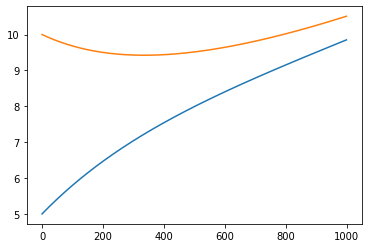

In [94]:
wygeneruj_wykres(0.00025, 0.0015, 0.0015, 0.00035, 5, 10)

In [42]:
def wykres(a, b, c, d):
    
    ford_1 = [5]
    GM_1 = [10]

    for i in range(1,1000):
    
        gm_r = b
        f_r = c

        if i > 3:
            ford_1.append((ford_1[i-1]*a) - (ford_1[i-1]*gm_r - GM_1[i-1]*f_r))
            GM_1.append((GM_1[i-1]*d) + (ford_1[i-1]*gm_r-GM_1[i-1]*(f_r)))
        else:
            ford_1.append(ford_1[i-1]*a)
            GM_1.append(GM_1[i-1]*d)

    plt.plot(ford_1)
    plt.plot(GM_1)
    plt.show()

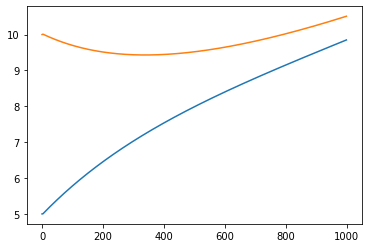

In [46]:
wykres(1.00025, 0.0015, 0.0015, 1.00035)